In [1]:
import os
import cv2
import pandas as pd
import numpy as np
from skimage.transform import resize
from matplotlib import pyplot as plt


In [2]:
data_path = "image_dataset"

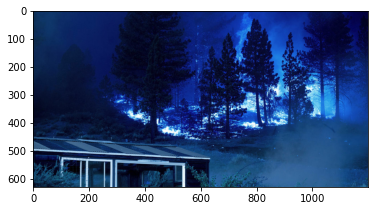

In [3]:
img = cv2.imread("image_dataset/fire/wild_fire_69.jpeg")
plt.imshow(img)

In [8]:
def preprocessing_img(in_path):
    img_flat = []
    img_list = []
    img_label = []
    cat = ['fire', 'no_fire']
    for i in cat:
        print("pass")
        cnt = 0
        path = os.path.join(in_path, i)
        for img in os.listdir(path):
            cnt += 1
            img_arr = cv2.imread(os.path.join(path, img))
            try:
                img_arr.shape
                # print("checked for shape".format(img_arr.shape))
            except AttributeError:
                print("shape not found")
                continue
            #code to move to next frame
            # plt.imshow(img_arr)
            # plt.show()
            img_arr = resize(img_arr,(100,100,3))
            img_flat.append(img_arr.flatten())
            img_list.append(img_arr)
            img_label.append(i)
        print(cnt)
    return np.array(img_flat), np.array(img_list), np.array(img_label)

data_img_flat, data_img_list, data_img_label = preprocessing_img(data_path)

pass
shape not found
1017
pass
1178


In [137]:
df = pd.DataFrame(data_img_flat)
df['label'] = data_img_label
print(df.shape)

(2194, 30001)


In [138]:
labels = df['label'].value_counts().index.tolist()
labels

['no_fire', 'fire']

---

In [139]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from prettytable import PrettyTable

In [140]:
df_train_val, df_test = train_test_split(df, test_size = 0.3, random_state=23)
print(df_train_val.shape)
print(df_test.shape)

(1535, 30001)
(659, 30001)


In [141]:
X_train_val = df_train_val.drop(['label'], axis = 1)
y_train_val = df_train_val['label']
X_test = df_test.drop(['label'], axis = 1)
y_test = df_test['label']

In [142]:
K = 5
kf = KFold(n_splits = 5)
svc = SVC(kernel='linear')
acc_sum = 0
pre_sum = 0
rec_sum = 0


for train_index, val_index in kf.split(X_train_val):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_val)
    acc_sum += accuracy_score(y_val, y_pred)
    pre_sum += precision_score(y_val, y_pred, average = None)
    rec_sum += recall_score(y_val, y_pred, average = None)

acc_avg = acc_sum / K
pre_avg = pre_sum / K
rec_avg = rec_sum / K

print("##### Validation ##########################################################")
print("##### {}-Fold ##############################################################".format(K))
print("##### SVC #######################################################")
print("##### kernel = linear ###")
myTable = PrettyTable()
myTable.add_column("Class", labels)
myTable.add_column("Accuracy", [acc_avg, acc_avg])
myTable.add_column("Precision", pre_avg)
myTable.add_column("Recall", rec_avg)
print(myTable)
# print(pd.DataFrame(cm_avg))
print("##### Test ################################################################")
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
myTable = PrettyTable()
myTable.add_column("Class", labels)
myTable.add_column("Accuracy", [acc, acc])
myTable.add_column("Precision", precision_score(y_test, y_pred, average=None))
myTable.add_column("Recall", recall_score(y_test, y_pred, average=None))
print(myTable)
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))


##### Validation ##########################################################
##### 5-Fold ##############################################################
##### SVC #######################################################
##### kernel = linear ###
+---------+--------------------+--------------------+--------------------+
|  Class  |      Accuracy      |     Precision      |       Recall       |
+---------+--------------------+--------------------+--------------------+
| no_fire | 0.8123778501628666 | 0.7763683739309224 | 0.8355729335338689 |
|   fire  | 0.8123778501628666 | 0.8488329591749361 | 0.7933770031138453 |
+---------+--------------------+--------------------+--------------------+
##### Test ################################################################
+---------+--------------------+--------------------+--------------------+
|  Class  |      Accuracy      |     Precision      |       Recall       |
+---------+--------------------+--------------------+--------------------+
| no_

In [143]:
out = svc.predict([data_img_flat[2160]])
print(out)

['no_fire']


---

In [44]:
from skimage.feature import hog
from skimage import data, color, feature

In [33]:
ppc = 16
hog_images = []
hog_features = []

for image in data_img_list:
    
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

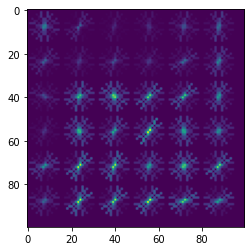

In [47]:
plt.imshow(hog_images[56])

In [ ]:
hog_features = np.array(hog_features)
print(hog_features.shape)

In [144]:
df = pd.DataFrame(hog_features)
df['label'] = data_img_label
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1143,1144,1145,1146,1147,1148,1149,1150,1151,label
0,0.018707,0.009473,0.015426,0.007505,0.015692,0.014133,0.015881,0.019696,0.030796,0.018204,...,0.028303,0.085664,0.048522,0.072581,0.088038,0.148372,0.037612,0.054661,0.037704,fire
1,0.091565,0.097430,0.068045,0.048752,0.066923,0.039786,0.032973,0.052780,0.091906,0.076477,...,0.110206,0.041389,0.052963,0.064620,0.043576,0.040328,0.026338,0.043610,0.036673,fire
2,0.006496,0.054104,0.126339,0.044147,0.014969,0.000000,0.000000,0.000000,0.003749,0.000000,...,0.005710,0.002853,0.002789,0.008176,0.018358,0.019321,0.004770,0.003106,0.001967,fire
3,0.014819,0.006700,0.017363,0.011901,0.027519,0.026274,0.026652,0.027158,0.027951,0.008139,...,0.071773,0.015766,0.021134,0.038809,0.044990,0.069164,0.044423,0.030653,0.031040,fire
4,0.016270,0.012809,0.026105,0.036880,0.046439,0.011491,0.011523,0.006910,0.019667,0.005495,...,0.052899,0.024107,0.023583,0.038797,0.125621,0.176800,0.074230,0.045891,0.030403,fire


In [145]:
df_train_val, df_test = train_test_split(df, test_size = 0.3, random_state=23)
print(df_train_val.shape)
print(df_test.shape)

(1535, 1153)
(659, 1153)


In [146]:
X_train_val = df_train_val.drop(['label'], axis = 1)
y_train_val = df_train_val['label']
X_test = df_test.drop(['label'], axis = 1)
y_test = df_test['label']

---

In [147]:
K = 5
kf = KFold(n_splits = K)
svc = SVC(kernel='linear')
acc_sum = 0
pre_sum = 0
rec_sum = 0


for train_index, val_index in kf.split(X_train_val):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_val)
    acc_sum += accuracy_score(y_val, y_pred)
    pre_sum += precision_score(y_val, y_pred, average = None)
    rec_sum += recall_score(y_val, y_pred, average = None)

acc_avg = acc_sum / K
pre_avg = pre_sum / K
rec_avg = rec_sum / K

print("##### Validation ##########################################################")
print("##### {}-Fold ##############################################################".format(K))
print("##### SVC #################################################################")
print("##### kernel = linear #####################################################")
myTable = PrettyTable()
myTable.add_column("Class", labels)
myTable.add_column("Accuracy", [acc_avg, acc_avg])
myTable.add_column("Precision", pre_avg)
myTable.add_column("Recall", rec_avg)
print(myTable)
# print(pd.DataFrame(cm_avg))
print("##### Test ################################################################")
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
myTable = PrettyTable()
myTable.add_column("Class", labels)
myTable.add_column("Accuracy", [acc, acc])
myTable.add_column("Precision", precision_score(y_test, y_pred, average=None))
myTable.add_column("Recall", recall_score(y_test, y_pred, average=None))
print(myTable)
# print(pd.DataFrame(confusion_matrix(y_test, y_pred)))


##### Validation ##########################################################
##### 5-Fold ##############################################################
##### SVC #################################################################
##### kernel = linear #####################################################
+---------+-------------------+--------------------+--------------------+
|  Class  |      Accuracy     |     Precision      |       Recall       |
+---------+-------------------+--------------------+--------------------+
| no_fire | 0.828013029315961 | 0.829550992063492  | 0.7918289726131273 |
|   fire  | 0.828013029315961 | 0.8276250993315066 | 0.8593293840662263 |
+---------+-------------------+--------------------+--------------------+
##### Test ################################################################
+---------+--------------------+--------------------+--------------------+
|  Class  |      Accuracy      |     Precision      |       Recall       |
+---------+---------------

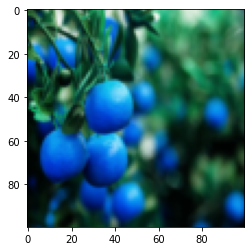

In [119]:
# orange_img = cv2.imread("image_dataset/no_fire/tangerine_6.jpeg")
# tmp_img = cv2.cvtColor(data_img_list[2060], cv2.COLOR_BGR2RGB)
orange_img = data_img_list[2160].copy()
plt.imshow(orange_img)

In [129]:
[hog_features[2160]]

[array([0.10972443, 0.03671441, 0.03870412, ..., 0.07540027, 0.06682313,
        0.0648217 ])]

In [130]:
out = svc.predict([hog_features[2160]])
print(out)

['no_fire']


---

In [154]:
K = 2
kf = KFold(n_splits = K)
svc = SVC(kernel='linear')
acc_sum = 0
pre_sum = 0
rec_sum = 0


for train_index, val_index in kf.split(X_train_val):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_val)
    acc_sum += accuracy_score(y_val, y_pred)
    pre_sum += precision_score(y_val, y_pred, average = None)
    rec_sum += recall_score(y_val, y_pred, average = None)

acc_avg = acc_sum / K
pre_avg = pre_sum / K
rec_avg = rec_sum / K

print("##### Validation ##########################################################")
print("##### {}-Fold ##############################################################".format(K))
print("##### SVC #################################################################")
print("##### kernel = linear #####################################################")
myTable = PrettyTable()
myTable.add_column("Class", labels)
myTable.add_column("Accuracy", [acc_avg, acc_avg])
myTable.add_column("Precision", pre_avg)
myTable.add_column("Recall", rec_avg)
print(myTable)
# print(pd.DataFrame(cm_avg))
print("##### Test ################################################################")
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
myTable = PrettyTable()
myTable.add_column("Class", labels)
myTable.add_column("Accuracy", [acc, acc])
myTable.add_column("Precision", precision_score(y_test, y_pred, average=None))
myTable.add_column("Recall", recall_score(y_test, y_pred, average=None))
print(myTable)
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))


##### Validation ##########################################################
##### 2-Fold ##############################################################
##### SVC #################################################################
##### kernel = linear #####################################################
+---------+--------------------+--------------------+--------------------+
|  Class  |      Accuracy      |     Precision      |       Recall       |
+---------+--------------------+--------------------+--------------------+
| no_fire | 0.8228046229900043 | 0.8156158357771262 | 0.7970356926799758 |
|   fire  | 0.8228046229900043 | 0.8290673528349585 | 0.8453201970443349 |
+---------+--------------------+--------------------+--------------------+
##### Test ################################################################
+---------+--------------------+--------------------+--------------------+
|  Class  |      Accuracy      |     Precision      |       Recall       |
+---------+---------

---

In [153]:
K = 5
kf = KFold(n_splits = K)

##### poly #####
gamma_list = [0.001, 0.01, 0.1]
coe_list = [0, 0.1, 0.8]
degree_list = [3, 5, 8]
best_acc = 0
best_pre = 0
best_rec = 0
hyper_para_poly = [0, 0, 0]
svc_final = 0
##### poly #####

for gamma in gamma_list:
        for coe in coe_list:
            for degree in degree_list:
                acc_sum = 0
                pre_sum = 0
                rec_sum = 0
                svc = SVC(gamma=gamma, coef0=coe, degree=degree, kernel = 'poly')
                for train_index, val_index in kf.split(X_train_val):
                    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
                    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
                    svc.fit(X_train, y_train)
                    y_pred = svc.predict(X_val)
                    acc_sum += accuracy_score(y_val, y_pred)
                    pre_sum += precision_score(y_val, y_pred, average = None)
                    rec_sum += recall_score(y_val, y_pred, average = None)

                acc_avg = acc_sum / K
                pre_avg = pre_sum / K
                rec_avg = rec_sum / K

                if(best_acc < acc_avg):
                    svc_final = svc
                    best_acc = acc_avg
                    best_pre = pre_avg
                    best_rec = rec_avg
                    hyper_para_poly = [gamma, coe, degree]


print("##### Validation ##########################################################")
print("##### {}-Fold ##############################################################".format(K))
print("##### SVC #################################################################")
print("##### kernel = poly #####################################################")
myTable = PrettyTable()
myTable.add_column("Class", labels)
myTable.add_column("Accuracy", [best_acc, best_acc])
myTable.add_column("Precision", best_pre)
myTable.add_column("Recall", best_rec)
print(myTable)
# print(pd.DataFrame(cm_avg))
print("##### Test ################################################################")
# svc_final = SVC(gamma=hyper_para_poly[0], coef0=hyper_para_poly[1], degree=hyper_para_poly[2], kernel = 'poly')
# svc_final.fit(X_train, y_train)
print("hyper parameter: gamma={}, coef0={}, degree={}".format(hyper_para_poly[0], hyper_para_poly[1], hyper_para_poly[2]))
y_pred = svc_final.predict(X_test)
acc = accuracy_score(y_test, y_pred)
myTable = PrettyTable()
myTable.add_column("Class", labels)
myTable.add_column("Accuracy", [acc, acc])
myTable.add_column("Precision", precision_score(y_test, y_pred, average=None))
myTable.add_column("Recall", recall_score(y_test, y_pred, average=None))
print(myTable)
# print(pd.DataFrame(confusion_matrix(y_test, y_pred)))


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetri

##### Validation ##########################################################
##### 5-Fold ##############################################################
##### SVC #################################################################
##### kernel = poly #####################################################
+---------+--------------------+--------------------+--------------------+
|  Class  |      Accuracy      |     Precision      |       Recall       |
+---------+--------------------+--------------------+--------------------+
| no_fire | 0.8631921824104236 | 0.8504172272396298 | 0.8553030483649534 |
|   fire  | 0.8631921824104236 | 0.8752191275377458 | 0.8709341535657324 |
+---------+--------------------+--------------------+--------------------+
##### Test ################################################################
hyper parameter: gamma=0.1, coef0=0.1, degree=p8
+---------+-------------------+--------------------+--------------------+
|  Class  |      Accuracy     |     Precision    